In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import warnings
import os
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import KFold

warnings.filterwarnings('ignore')

In [3]:
#importing the data
processed_data_path = os.path.join(os.path.pardir, '/Users/Acer','jupyterPro')
train_file_path = os.path.join(processed_data_path,"train.csv")
test_file_path = os.path.join(processed_data_path,"test.csv")

In [4]:
X = pd.read_csv(train_file_path)
y = pd.read_csv(test_file_path)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (73096, 10)
y shape: (73096, 1)


In [5]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (58476, 10)
y_train dataset:  (58476, 1)
X_test dataset:  (14620, 10)
y_test dataset:  (14620, 1)


In [7]:
#creating a dummy model
strategies = ['most_frequent', 'stratified', 'uniform'] 
  
test_scores = [] 
for s in strategies: 
    #if s =='constant': 
       # dclf = DummyClassifier(strategy = s, random_state = 0) 
    #else: 
    dclf = DummyClassifier(strategy = s, random_state = 0) 
    dclf.fit(X_train, y_train) 
    score = dclf.score(X_test, y_test) 
    test_scores.append(score)
print("Test scores :", test_scores)
# accuracy score
print('accuracy for baseline model : {0:.2f}'.format(accuracy_score(y_test, dclf.predict(X_test))))

Test scores : [0.4984952120383037, 0.507797537619699, 0.49863201094391246]
accuracy for baseline model : 0.50


# Models

In [9]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 0)

def model_classifier(model, X, y, cv):
    scores = []
    
    
    for train_index,test_index in cv.split(X,y):
        X_train,X_test = X.loc[train_index],X.loc[test_index]
        y_train,y_test = y.loc[train_index],y.loc[test_index]

        # Fit the model on the training data
        model_obj = model.fit(X_train, y_train)
        y_pred = model_obj.predict(X_test)
        y_pred_prob = model_obj.predict_proba(X_test)[:,1]
        # Score the model on the validation data
        score = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        scores.append(score)
        mean_score = np.array(scores).mean()    

    print('Accuracy scores of the model: {:.2f}'.format(mean_score))
    print('\n Classification report of the model')
    print('--------------------------------------')
    print(report)
    
    print('\n Confusion Matrix of the model')
    print('--------------------------------------')
    print(conf_matrix)
    
    print("\n ROC Curve")
    
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure()
    val_model = input("Enter your model name: ")
    plt.plot(fpr, tpr, label= val_model + ' (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

LogisticRegression

In [11]:
#instantiate the model
model_log = LogisticRegression(max_iter=1000)

Accuracy scores of the model: 0.73

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      3709
           1       0.76      0.68      0.72      3600

    accuracy                           0.74      7309
   macro avg       0.74      0.74      0.74      7309
weighted avg       0.74      0.74      0.74      7309


 Confusion Matrix of the model
--------------------------------------
[[2935  774]
 [1149 2451]]

 ROC Curve
Enter your model name: logistic_regression


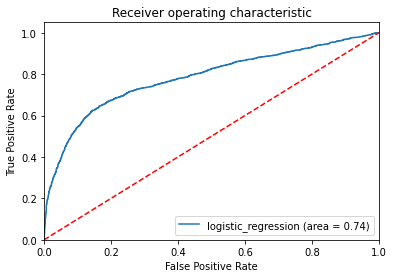

In [12]:
#fit the model
model_classifier(model_log, X, y, kf)

Decision Tree

In [13]:
model_decisiontree = DecisionTreeClassifier(random_state=42)

Accuracy scores of the model: 0.95

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      3709
           1       0.91      1.00      0.95      3600

    accuracy                           0.95      7309
   macro avg       0.95      0.95      0.95      7309
weighted avg       0.95      0.95      0.95      7309


 Confusion Matrix of the model
--------------------------------------
[[3338  371]
 [   6 3594]]

 ROC Curve
Enter your model name: Decision_tree


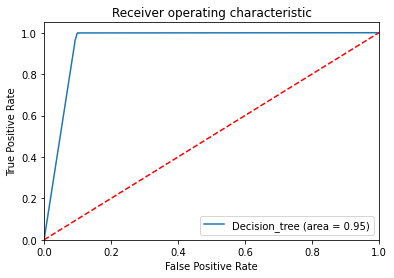

In [14]:
#fit the model
model_classifier(model_decisiontree, X, y, kf)

Random Forest

In [15]:
model_randomforest = RandomForestClassifier(max_depth=6, random_state=42)

Accuracy scores of the model: 0.74

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.83      0.77      3709
           1       0.79      0.68      0.73      3600

    accuracy                           0.75      7309
   macro avg       0.76      0.75      0.75      7309
weighted avg       0.76      0.75      0.75      7309


 Confusion Matrix of the model
--------------------------------------
[[3065  644]
 [1166 2434]]

 ROC Curve
Enter your model name: Random_forest


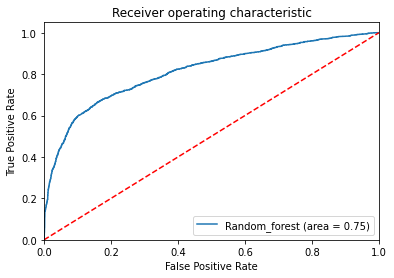

In [16]:
#fit the model
model_classifier(model_randomforest, X, y, kf)

XGBoost

In [17]:
#instantiating the model
model_xgb = XGBClassifier(eval_metric='mlogloss')

Accuracy scores of the model: 0.85

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      3709
           1       0.86      0.82      0.84      3600

    accuracy                           0.85      7309
   macro avg       0.85      0.85      0.85      7309
weighted avg       0.85      0.85      0.85      7309


 Confusion Matrix of the model
--------------------------------------
[[3231  478]
 [ 652 2948]]

 ROC Curve
Enter your model name: Xgboost


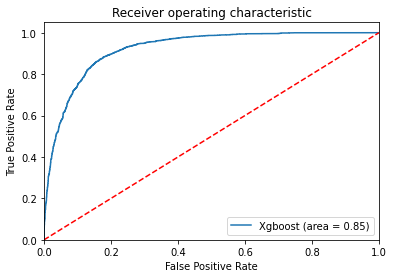

In [18]:
model_classifier(model_xgb,X,y,kf)